# 2. Machine Learning for Regression

In [18]:
import pandas as pd
import numpy as np

## Data preparation

In [19]:
df=pd.read_csv("data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
df.columns= df.columns.str.lower().str.replace(" ","_")

In [21]:
strings=list(df.dtypes[df.dtypes=="object"].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [22]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [23]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

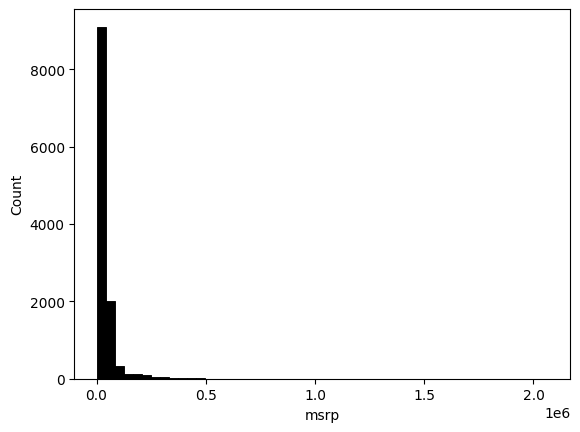

In [25]:
# plt.figure(figsize=(6, 4))

sns.histplot(df["msrp"], bins=50, color='black', alpha=1)
# plt.ylabel('Frequency')
# plt.xlabel('Price')
# plt.title('Distribution of prices')

# plt.show()


<Axes: xlabel='msrp', ylabel='Count'>

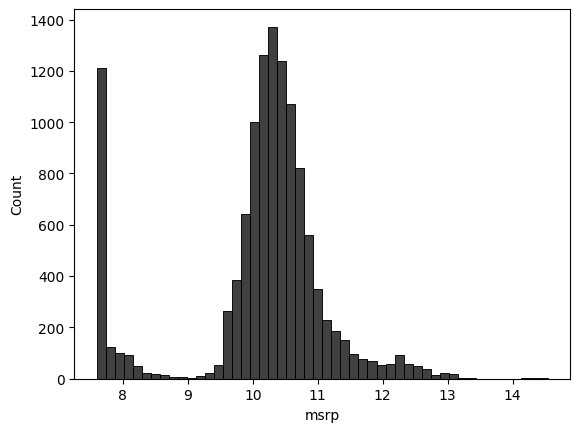

In [26]:
price_logs = np.log1p(df["msrp"])
sns.histplot(price_logs,bins=50,color='black')

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 setting up the validation framework

In [28]:
n=len(df)
n_val = int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [29]:
df_val=df.iloc[n_train:]
df_test=df.iloc[n_train:n_train+n_val]
df_train = df.iloc[n_train+n_val:]

In [30]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [31]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [32]:
y_train_orig=df_train["msrp"].values
y_val_orig=df_val["msrp"].values
y_test_orig=df_test["msrp"].values

In [33]:
y_train =np.log1p(df_train["msrp"].values)
y_val =np.log1p(df_val["msrp"].values)
y_test =np.log1p(df_test["msrp"].values)

del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

In [34]:
len(y_train) , len(y_val),len(y_test)

(7150, 2382, 2382)

## Linear Regression

In [35]:
df_train.iloc[10]

make                                     porsche
model                                    boxster
year                                        2014
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  265.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category          luxury,high-performance
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   30
city_mpg                                      20
popularity                                  1715
Name: 2004, dtype: object

In [36]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]


In [37]:
def linear_regression(xi):
    pred = w0
    n = len(xi)
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred


In [38]:
pred = linear_regression(xi)
pred


12.312

In [39]:
np.expm1(pred)


222347.2221101062

In [40]:
y_train[10]

10.827766295132466

In [41]:
np.expm1(y_train[10])


50400.00000000003